# CS4650 Capstone: Kaggle Competition - Spaceship Titanic

## Initial Setup

### Import libraries

In [111]:
# Standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Configure visualization styles
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-darkgrid') # Using a specific style from matplotlib

# YDF will come later, but good to have handy
import ydf

print("Libraries imported successfully!")

Libraries imported successfully!


### Load data and inspect

In [112]:
# Define file paths (adjust if your notebook is not in the same folder as the CSVs)
train_data_path = 'train.csv'
test_data_path = 'test.csv'
submission_path = 'sample_submission.csv'

# Load the datasets into pandas DataFrames
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)
df_submission = pd.read_csv(submission_path)

print(f"Training data shape: {df_train.shape}")
print(f"Test data shape: {df_test.shape}")
print(f"Submission example shape: {df_submission.shape}")

Training data shape: (8693, 14)
Test data shape: (4277, 13)
Submission example shape: (4277, 2)


In [113]:
# Look at the first few rows of the training data
print("First 5 rows of training data:")
display(df_train.head())

# Look at the first few rows of the test data
print("\nFirst 5 rows of test data:")
display(df_test.head())

# Look at the submission format
print("\nSample submission format:")
display(df_submission.head())

First 5 rows of training data:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True



First 5 rows of test data:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez



Sample submission format:


,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [114]:
# Get concise summary of the training dataframe
print("\nTraining data info:")
df_train.info()

print("\nTest data info:")
df_test.info()

# Get descriptive statistics for numerical columns in training data
print("\nTraining data numerical statistics:")
display(df_train.describe())

# Get descriptive statistics for categorical columns too (include='all' gets both)
print("\nTraining data all columns statistics:")
display(df_train.describe(include='all'))


Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

Test data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000



Training data all columns statistics:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Anton Woody,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [115]:
# Calculate the number of missing values per column in the training set
print("Missing values per column (Train):")
missing_train = df_train.isnull().sum()
print(missing_train[missing_train > 0]) # Only show columns with missing values

# Calculate the number of missing values per column in the test set
print("\nMissing values per column (Test):")
missing_test = df_test.isnull().sum()
print(missing_test[missing_test > 0]) # Only show columns with missing values

Missing values per column (Train):
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

Missing values per column (Test):
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64



Distribution of Target Variable (Transported):
Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64


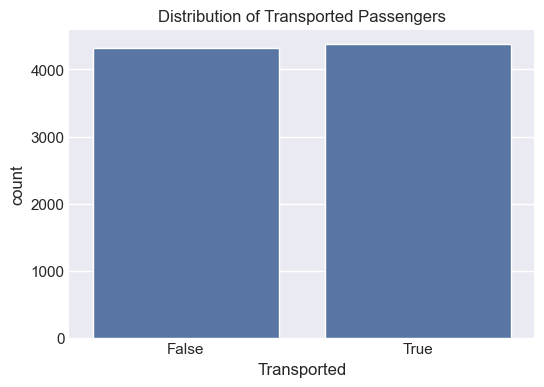

In [116]:
# See the distribution of the target variable 'Transported'
print("\nDistribution of Target Variable (Transported):")
print(df_train['Transported'].value_counts(normalize=True)) # normalize=True gives percentage

# Visualize the distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_train, x='Transported')
plt.title('Distribution of Transported Passengers')
plt.show()

### Data cleanup and feature extraction

In [117]:
# Make copies to avoid modifying the original dataframes unintentionally
df_train_processed = df_train.copy()
df_test_processed = df_test.copy()

# --- Cabin Features ---
# The 'Cabin' column is in 'deck/num/side' format. Let's split it.
# We'll fill missing Cabin values with a placeholder 'Unknown/0/Unknown' first
# Then split. Use errors='ignore' in case splitting fails on the placeholder.
for df in [df_train_processed, df_test_processed]:
    df['Cabin'] = df['Cabin'].fillna('Unknown/0/Unknown')
    # Use expand=True to get new columns directly
    df[['Deck', 'Cabin_Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
    # We probably don't need the original 'Cabin' or the 'Cabin_Num' now
    # Cabin_Num might be useful later, but let's drop it for now for simplicity
    # Also convert Cabin_Num to numeric, coercing errors
    df['Cabin_Num'] = pd.to_numeric(df['Cabin_Num'], errors='coerce') # Coerce will turn non-numbers into NaN
    # Let's keep Cabin_Num for now, might be useful. Drop original 'Cabin'.
    df.drop('Cabin', axis=1, inplace=True)

print("Split 'Cabin' into 'Deck', 'Cabin_Num', 'Side'. Filled NaNs initially.")
display(df_train_processed[['Deck', 'Cabin_Num', 'Side']].head())

# --- Expenditure Features ---
expenditure_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# Create 'TotalExpenditure'
for df in [df_train_processed, df_test_processed]:
    # Fill NaN in expenditure columns with 0 before summing
    df[expenditure_cols] = df[expenditure_cols].fillna(0)
    df['TotalExpenditure'] = df[expenditure_cols].sum(axis=1)
    # Create a binary feature for anyone who spent *anything*
    df['HasExpenditure'] = (df['TotalExpenditure'] > 0).astype(int) # Convert boolean to 0/1

print("\nCreated 'TotalExpenditure' and 'HasExpenditure'. Filled NaNs in components with 0.")
display(df_train_processed[['TotalExpenditure', 'HasExpenditure'] + expenditure_cols].head())

# --- Group Information from PassengerId ---
# PassengerId is 'gggg_pp'. gggg is the group, pp is the person within the group.
for df in [df_train_processed, df_test_processed]:
    df['Group'] = df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
    df['GroupSize'] = df.groupby('Group')['PassengerId'].transform('count')

print("\nExtracted 'Group' and calculated 'GroupSize' from PassengerId.")
display(df_train_processed[['PassengerId', 'Group', 'GroupSize']].head())

# --- Drop Less Useful Columns ---
# Name might be complex to parse reliably, PassengerId is redundant now we have Group/GroupSize
# Let's drop them for now. Revisit 'Name' later if needed.
# Also dropping original Cabin (already done) and Cabin_Num (might be noisy/less useful than Deck/Side)
# EDIT: decided to keep Cabin_Num for now, let's drop Name and PassengerId
for df in [df_train_processed, df_test_processed]:
     df.drop(['Name', 'PassengerId'], axis=1, inplace=True)

print("\nDropped 'Name' and 'PassengerId' columns.")

Split 'Cabin' into 'Deck', 'Cabin_Num', 'Side'. Filled NaNs initially.


,Deck,Cabin_Num,Side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S



Created 'TotalExpenditure' and 'HasExpenditure'. Filled NaNs in components with 0.


,TotalExpenditure,HasExpenditure,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,736.0,1,109.0,9.0,25.0,549.0,44.0
2,10383.0,1,43.0,3576.0,0.0,6715.0,49.0
3,5176.0,1,0.0,1283.0,371.0,3329.0,193.0
4,1091.0,1,303.0,70.0,151.0,565.0,2.0



Extracted 'Group' and calculated 'GroupSize' from PassengerId.


,PassengerId,Group,GroupSize
0,0001_01,1,1
1,0002_01,2,1
2,0003_01,3,2
3,0003_02,3,2
4,0004_01,4,1



Dropped 'Name' and 'PassengerId' columns.


In [118]:
# --- NEW FEATURE ENGINEERING CELL ---
import re # For regular expressions

# Make sure df_train_processed and df_test_processed exist from the previous cell
# Also, we need the 'Name' column for some features.
# If 'Name' was dropped in the previous cell, we need to reload or merge it back.

# --- Reload original data to get 'Name' column back ---

print("Re-applying initial processing to ensure 'Name' column is available...")
df_train_fe = pd.read_csv(train_data_path)
df_test_fe = pd.read_csv(test_data_path)

# Re-apply previous steps (Cabin, Expenditure, Group) to df_train_fe, df_test_fe
expenditure_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for df in [df_train_fe, df_test_fe]:
    # Cabin split
    df['Cabin'] = df['Cabin'].fillna('Unknown/0/Unknown')
    df[['Deck', 'Cabin_Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
    df['Cabin_Num'] = pd.to_numeric(df['Cabin_Num'], errors='coerce')
    df.drop('Cabin', axis=1, inplace=True)
    # Expenditures
    df[expenditure_cols] = df[expenditure_cols].fillna(0)
    df['TotalExpenditure'] = df[expenditure_cols].sum(axis=1)
    df['HasExpenditure'] = (df['TotalExpenditure'] > 0).astype(int)
    # Group info
    df['Group'] = df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
    df['GroupSize'] = df.groupby('Group')['PassengerId'].transform('count')
    # Drop only PassengerId for now
    df.drop('PassengerId', axis=1, inplace=True)

print("Initial processing re-applied.")

# --- Feature 1: Extracting Titles from 'Name' ---
print("\n--- Engineering 'Title' feature from 'Name' ---")
def extract_title(name):
    """Extracts title from a name string using regex."""
    if pd.isna(name): # Handle potential NaN names
        return "None"
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return "None"

for df in [df_train_fe, df_test_fe]:
    df['Title'] = df['Name'].apply(extract_title)
    # Consolidate rare titles
    common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
    # Group rare titles into 'Other'
    df['Title'] = df['Title'].apply(lambda x: x if x in common_titles else 'Other')
    print(f"Value counts for 'Title' in {'training' if 'Transported' in df.columns else 'test'} data:")
    print(df['Title'].value_counts())

# --- Feature 2: Family Size from 'Name' (using Surname) & IsAlone ---
print("\n--- Engineering 'FamilySize_Surname' and 'IsAlone' features ---")
for df in [df_train_fe, df_test_fe]:
    # Extract Surname
    df['Surname'] = df['Name'].apply(lambda x: x.split(',')[0].strip() if pd.notna(x) else 'Unknown')
    # Calculate family size based on surname occurrences
    df['FamilySize_Surname'] = df.groupby('Surname')['Surname'].transform('count')
    # Handle cases where Surname might be 'Unknown' if Name was NaN
    if 'Unknown' in df['Surname'].unique():
         unknown_surname_count = df[df['Surname'] == 'Unknown'].shape[0]
         # Avoid treating all 'Unknown' surnames as one large family
         df.loc[df['Surname'] == 'Unknown', 'FamilySize_Surname'] = 1

    # Create 'IsAlone' feature using GroupSize (more reliable)
    df['IsAlone'] = (df['GroupSize'] == 1).astype(int)
    print(f"'IsAlone' (from GroupSize) value counts in {'training' if 'Transported' in df.columns else 'test'} data:")
    print(df['IsAlone'].value_counts())
    # Optional: Display comparison if needed
    # display(df[['Name', 'Surname', 'FamilySize_Surname', 'GroupSize', 'IsAlone']].head())

# --- Feature 3: Binning 'Age' ---
print("\n--- Engineering 'Age_Bin' feature ---")
for df in [df_train_fe, df_test_fe]:
    # Age will be imputed later, pd.cut handles NaNs by default (assigns NaN bin)
    age_bins = [0, 12, 18, 30, 50, 100] # Child, Teen, YoungAdult, Adult, Senior
    age_labels = ['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior']
    df['Age_Bin'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
    print(f"'Age_Bin' value counts in {'training' if 'Transported' in df.columns else 'test'} data (before NaN fill):")
    print(df['Age_Bin'].value_counts(dropna=False)) # dropna=False shows NaNs

# --- Feature 4: Total People in Cabin (if multiple people share a cabin number) ---
print("\n--- Engineering 'Cabin_Occupancy' feature ---")
# Combine train and test temporarily to get global cabin occupancy, then map back
# This avoids data leakage while getting a more accurate occupancy count
temp_df = pd.concat([df_train_fe[['Deck', 'Cabin_Num', 'Side']], df_test_fe[['Deck', 'Cabin_Num', 'Side']]], ignore_index=True)
temp_df['Full_Cabin_ID'] = temp_df['Deck'].astype(str) + '/' + temp_df['Cabin_Num'].astype(str) + '/' + temp_df['Side'].astype(str)
# Calculate occupancy, excluding the placeholder 'Unknown/0/Unknown' from being counted as a single cabin
occupancy_map = temp_df[temp_df['Full_Cabin_ID'] != 'Unknown/0.0/Unknown']['Full_Cabin_ID'].value_counts().to_dict()

for df in [df_train_fe, df_test_fe]:
    # Create Full_Cabin_ID again for mapping
    df['Full_Cabin_ID'] = df['Deck'].astype(str) + '/' + df['Cabin_Num'].astype(str) + '/' + df['Side'].astype(str)
    # Map occupancy, fill NaN/placeholders with 1 (assuming they are alone or in a unique unknown cabin)
    df['Cabin_Occupancy'] = df['Full_Cabin_ID'].map(occupancy_map).fillna(1).astype(int)
    # Handle the placeholder cabins explicitly - set their occupancy to 1
    df.loc[df['Full_Cabin_ID'] == 'Unknown/0.0/Unknown', 'Cabin_Occupancy'] = 1
    print(f"'Cabin_Occupancy' summary in {'training' if 'Transported' in df.columns else 'test'} data:")
    print(df['Cabin_Occupancy'].describe())
    # Drop the temporary Full_Cabin_ID
    df.drop('Full_Cabin_ID', axis=1, inplace=True)

# --- Drop columns no longer needed AFTER creating features ---
print("\n--- Dropping original 'Name' and 'Surname' columns ---")
for df in [df_train_fe, df_test_fe]:
    df.drop(['Name', 'Surname'], axis=1, inplace=True)

# --- IMPORTANT: Update df_train_processed and df_test_processed ---
# The rest of your notebook uses these variable names.
df_train_processed = df_train_fe.copy()
df_test_processed = df_test_fe.copy()
print("\nUpdated df_train_processed and df_test_processed with new features.")

# --- Display a sample ---
print("\n--- df_train_processed with new features (sample) ---")
display(df_train_processed.head())

Re-applying initial processing to ensure 'Name' column is available...
Initial processing re-applied.

--- Engineering 'Title' feature from 'Name' ---
Value counts for 'Title' in training data:
Title
Other    8693
Name: count, dtype: int64
Value counts for 'Title' in test data:
Title
Other    4277
Name: count, dtype: int64

--- Engineering 'FamilySize_Surname' and 'IsAlone' features ---
'IsAlone' (from GroupSize) value counts in training data:
IsAlone
1    4805
0    3888
Name: count, dtype: int64
'IsAlone' (from GroupSize) value counts in test data:
IsAlone
1    2340
0    1937
Name: count, dtype: int64

--- Engineering 'Age_Bin' feature ---
'Age_Bin' value counts in training data (before NaN fill):
Age_Bin
YoungAdult    3375
Adult         2783
Senior         811
Teen           780
Child          765
NaN            179
Name: count, dtype: int64
'Age_Bin' value counts in test data (before NaN fill):
Age_Bin
YoungAdult    1766
Adult         1325
Teen           381
Senior         376
Child

<>:40: SyntaxWarning: invalid escape sequence '\.'
<>:40: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Ryan_Laptop\AppData\Local\Temp\ipykernel_26476\103660370.py:40: SyntaxWarning: invalid escape sequence '\.'
  title_search = re.search(' ([A-Za-z]+)\.', name)



count    8693.000000
mean        8.586334
std        44.473934
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       299.000000
Name: Cabin_Occupancy, dtype: float64
'Cabin_Occupancy' summary in test data:
count    4277.000000
mean        8.683891
std        44.943246
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       299.000000
Name: Cabin_Occupancy, dtype: float64

--- Dropping original 'Name' and 'Surname' columns ---

Updated df_train_processed and df_test_processed with new features.

--- df_train_processed with new features (sample) ---


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Side,TotalExpenditure,HasExpenditure,Group,GroupSize,Title,FamilySize_Surname,IsAlone,Age_Bin,Cabin_Occupancy
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,P,0.0,0,1,1,Other,1,1,Adult,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,S,736.0,1,2,1,Other,1,1,YoungAdult,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,S,10383.0,1,3,2,Other,1,0,Senior,2
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,S,5176.0,1,3,2,Other,1,0,Adult,2
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,S,1091.0,1,4,1,Other,1,1,Teen,1


In [119]:
# Re-check missing values AFTER feature engineering but BEFORE imputation
print("Missing values BEFORE imputation (Train):")
print(df_train_processed.isnull().sum()[df_train_processed.isnull().sum() > 0])
print("\nMissing values BEFORE imputation (Test):")
print(df_test_processed.isnull().sum()[df_test_processed.isnull().sum() > 0])

# --- Imputation Strategy ---

# Define columns for median imputation (Numerical)
# Added FamilySize_Surname and Cabin_Occupancy
num_cols_impute_median = ['Age', 'Cabin_Num', 'FamilySize_Surname', 'Cabin_Occupancy']

# Define columns for mode imputation (Categorical)
# Added Title and Age_Bin
cat_cols_impute_mode = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side', 'Title', 'Age_Bin']

# Apply imputation to both training and test sets
for df in [df_train_processed, df_test_processed]:
    # Impute Numerical with Median (calculated from TRAINING data)
    for col in num_cols_impute_median:
        # Check if column exists and has NaNs before imputing
        if col in df.columns and df[col].isnull().any():
            # Calculate median from the training data ONLY
            median_val = df_train_processed[col].median()
            # Use assignment instead of inplace=True (good practice)
            df[col] = df[col].fillna(median_val)
            # Ensure integer types remain integer if applicable after fillna
            if pd.api.types.is_integer_dtype(df_train_processed[col].dropna()):
                 df[col] = df[col].astype(int)

    # Impute Categorical with Mode (calculated from TRAINING data)
    for col in cat_cols_impute_mode:
        # Check if column exists and has NaNs before imputing
        if col in df.columns and df[col].isnull().any():
            # Calculate mode from the training data ONLY
            mode_val = df_train_processed[col].mode()[0] # mode() can return multiple values, take the first
            # Use assignment instead of inplace=True
            df[col] = df[col].fillna(mode_val)

print("\n--- Imputation Complete ---")

# --- Verification ---
print("\nMissing values AFTER imputation (Train):")
print(df_train_processed.isnull().sum().sum()) # Should be 0

print("\nMissing values AFTER imputation (Test):")
print(df_test_processed.isnull().sum().sum()) # Should be 0

# Display info to check data types again
print("\nTrain data info after processing:")
df_train_processed.info()

# Display info for test data too
print("\nTest data info after processing:")
df_test_processed.info()

Missing values BEFORE imputation (Train):
HomePlanet     201
CryoSleep      217
Destination    182
Age            179
VIP            203
Age_Bin        179
dtype: int64

Missing values BEFORE imputation (Test):
HomePlanet     87
CryoSleep      93
Destination    92
Age            91
VIP            93
Age_Bin        91
dtype: int64

--- Imputation Complete ---

Missing values AFTER imputation (Train):
0

Missing values AFTER imputation (Test):
0

Train data info after processing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   HomePlanet          8693 non-null   object  
 1   CryoSleep           8693 non-null   bool    
 2   Destination         8693 non-null   object  
 3   Age                 8693 non-null   float64 
 4   VIP                 8693 non-null   bool    
 5   RoomService         8693 non-null   float64 
 6   FoodC

C:\Users\Ryan_Laptop\AppData\Local\Temp\ipykernel_26476\2428123015.py:38: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode_val)
C:\Users\Ryan_Laptop\AppData\Local\Temp\ipykernel_26476\2428123015.py:38: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode_val)


### Visualize the data

--- Numerical Feature Distributions (Training Data) ---


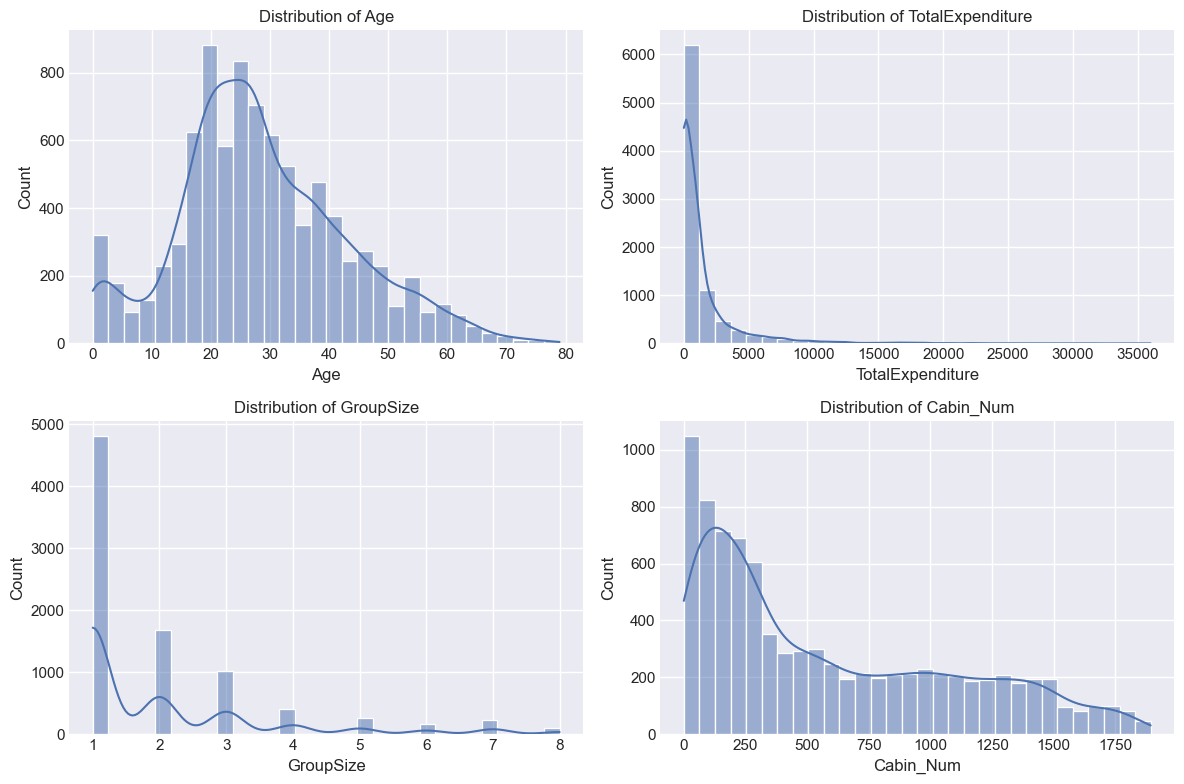

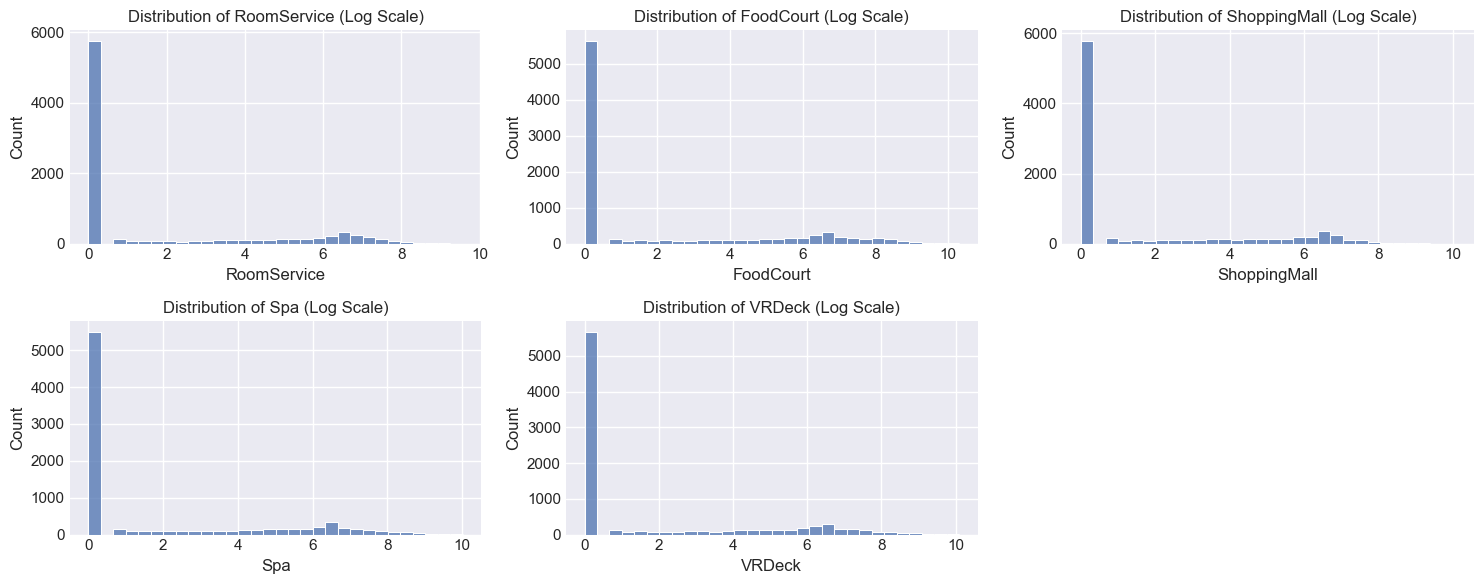

In [120]:
# Select numerical features for plotting (excluding IDs like Group if they act more like categories)
# Also excluding the individual expenditure columns since we have TotalExpenditure
numerical_features = ['Age', 'TotalExpenditure', 'GroupSize', 'Cabin_Num']
# Let's also look at the raw expenditure columns just in case
expenditure_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

print("--- Numerical Feature Distributions (Training Data) ---")

# Plot histograms for the main numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1) # Adjust grid size (2x2 here) as needed
    sns.histplot(df_train_processed[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Plot histograms for individual expenditures (many might be zero or skewed)
# Use a log scale often helps with heavily skewed data like expenditures
plt.figure(figsize=(15, 6))
for i, col in enumerate(expenditure_cols):
    plt.subplot(2, 3, i + 1) # Adjust grid size (2x3 here)
    # Plotting log(1 + x) to handle zero values
    sns.histplot(np.log1p(df_train_processed[col]), kde=False, bins=30)
    plt.title(f'Distribution of {col} (Log Scale)')
plt.tight_layout()
plt.show()


--- Categorical Feature Distributions (Training Data) ---


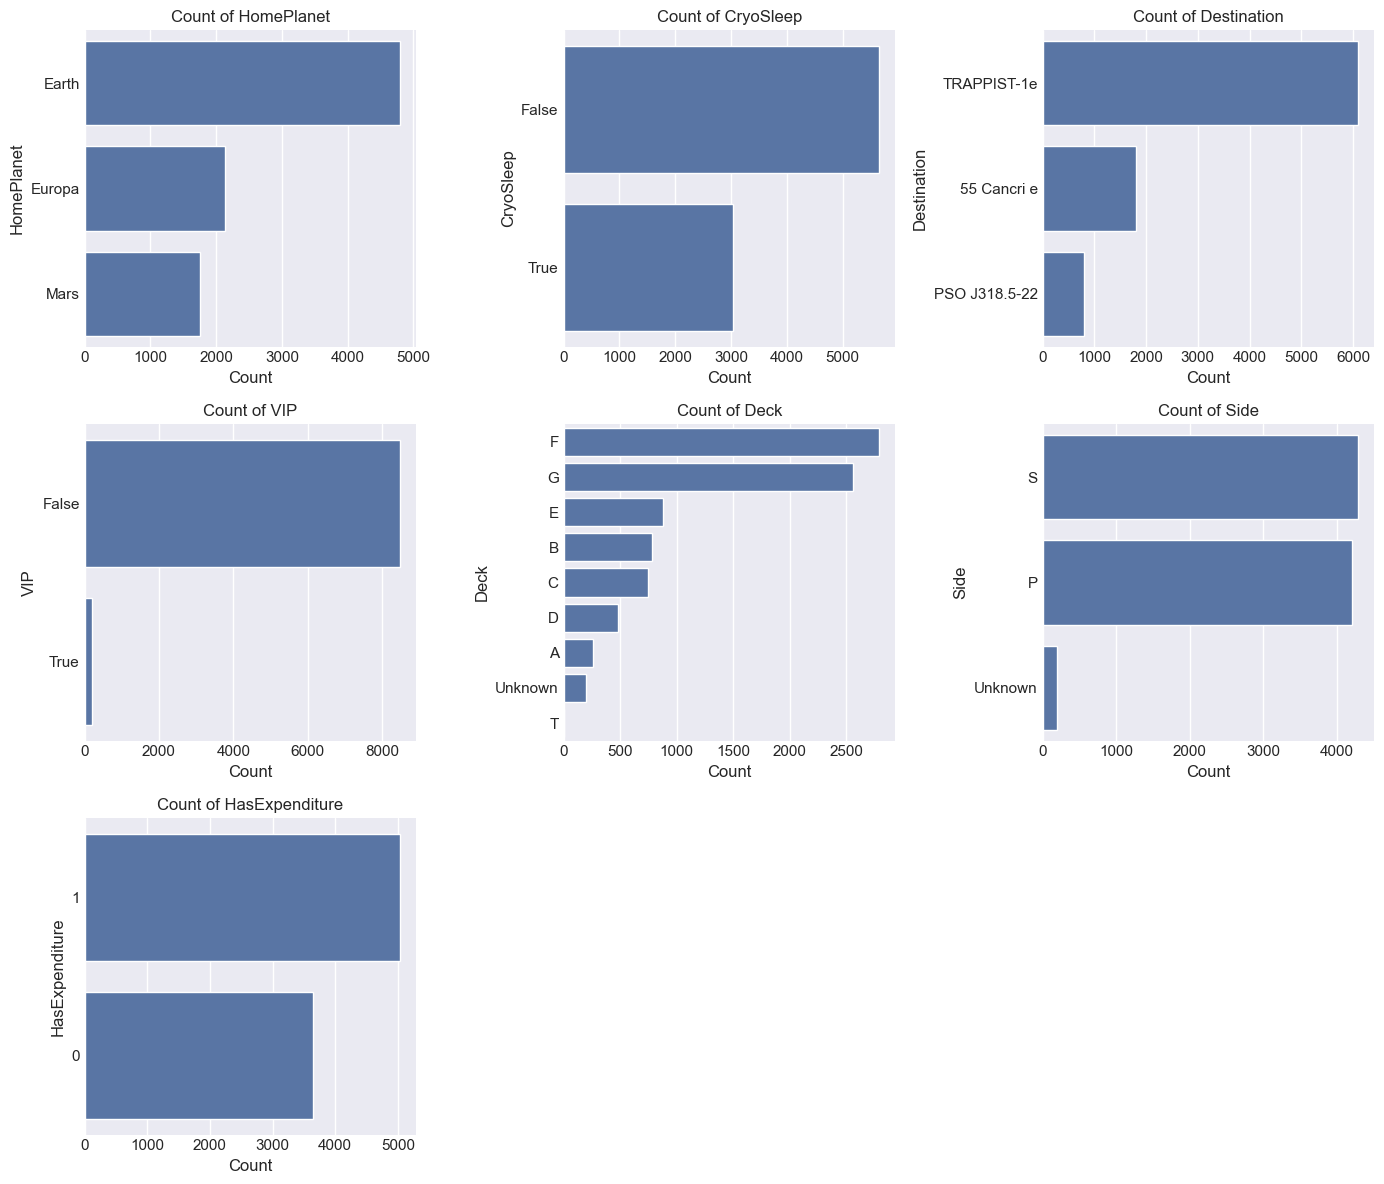

In [121]:
# Select key categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side', 'HasExpenditure']

print("\n--- Categorical Feature Distributions (Training Data) ---")

plt.figure(figsize=(14, 12)) # Increase figure size for more plots
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1) # Adjust grid size (3x3 here)
    sns.countplot(data=df_train_processed, y=col, order = df_train_processed[col].value_counts().index) # Order bars by count
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col) # y-axis label set automatically by seaborn with y=col
plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()


--- Numerical Features vs. Transported ---


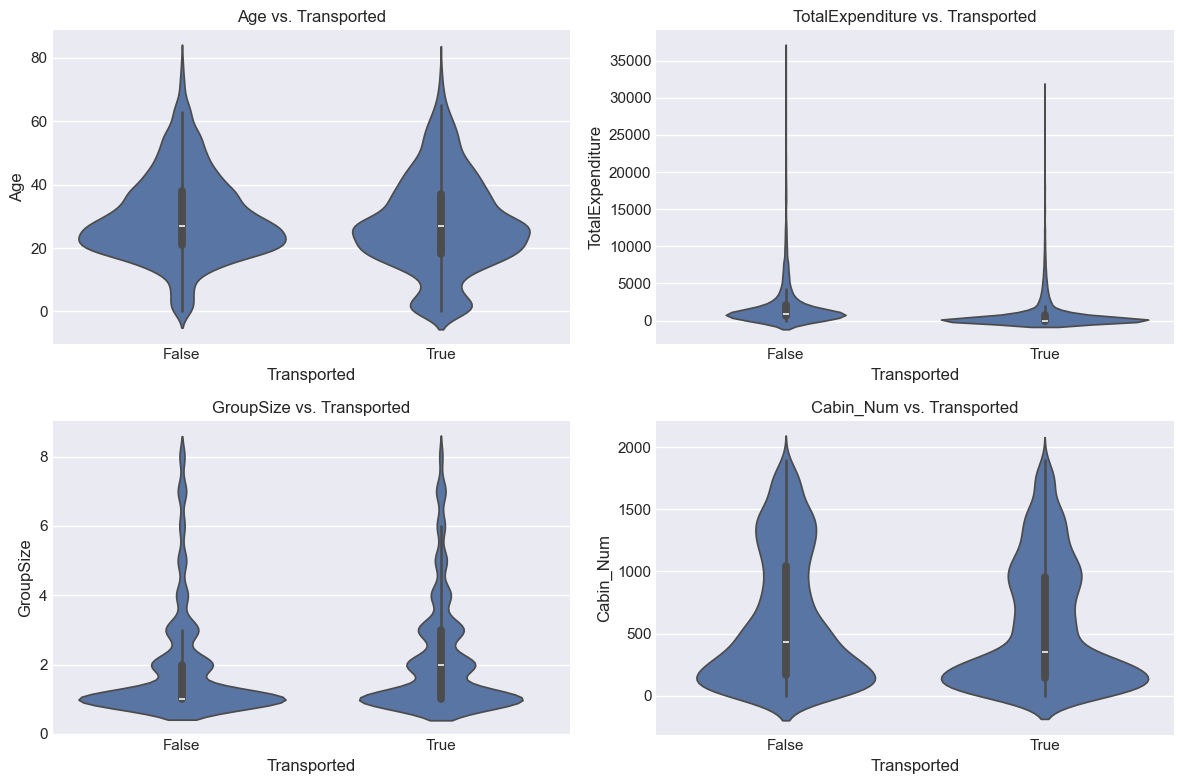

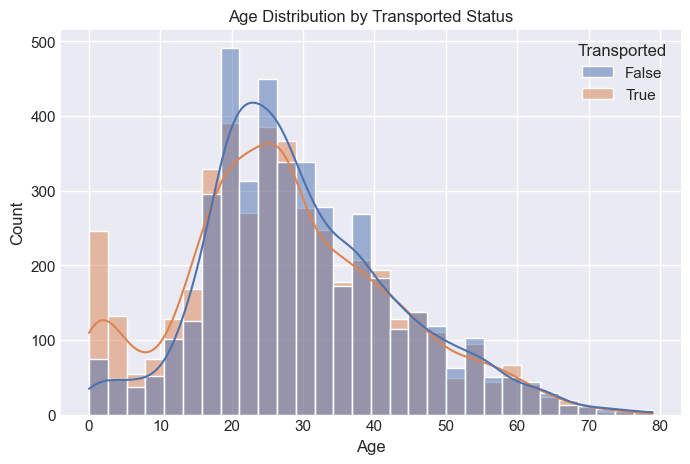

In [122]:
print("\n--- Numerical Features vs. Transported ---")

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1) # Adjust grid size
    # Violin plots combine a box plot with the kernel density estimation
    sns.violinplot(data=df_train_processed, x='Transported', y=col)
    # Box plots are simpler and show quartiles/outliers clearly
    # sns.boxplot(data=df_train_processed, x='Transported', y=col)
    plt.title(f'{col} vs. Transported')
plt.tight_layout()
plt.show()

# Let's specifically look at Age vs Transported with a histogram overlay
plt.figure(figsize=(8, 5))
sns.histplot(data=df_train_processed, x='Age', hue='Transported', kde=True, bins=30)
plt.title('Age Distribution by Transported Status')
plt.show()


--- Categorical Features vs. Transported ---


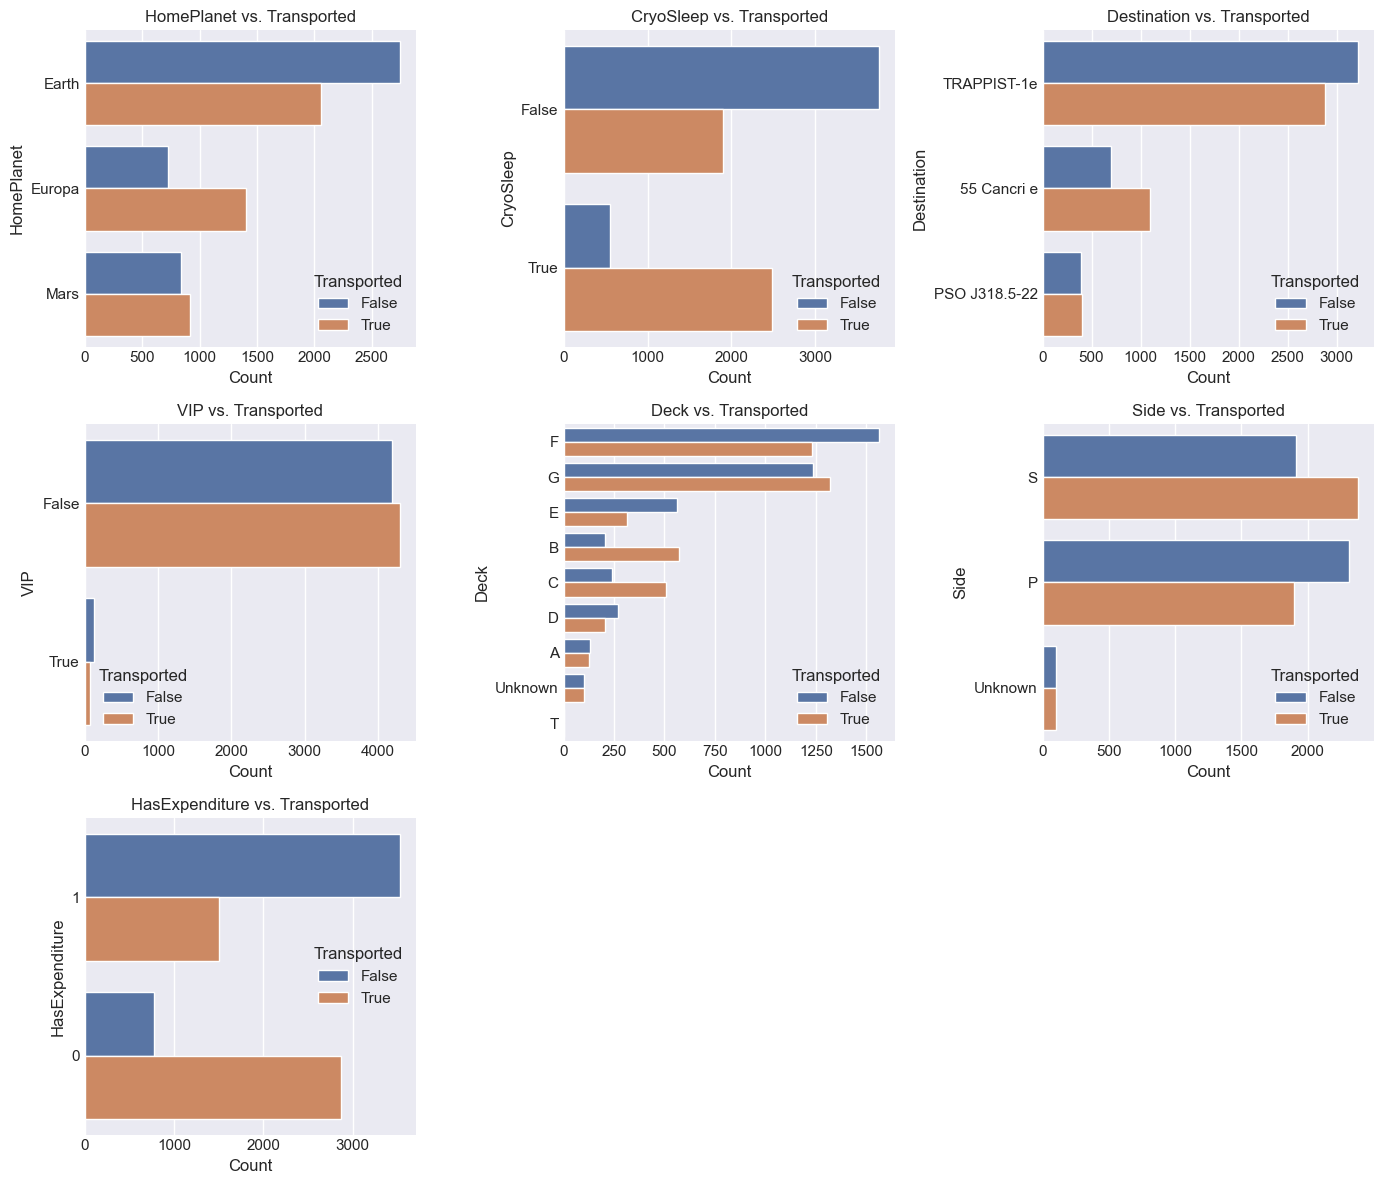

In [123]:
print("\n--- Categorical Features vs. Transported ---")

plt.figure(figsize=(14, 12)) # Increase figure size
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1) # Adjust grid size
    # Use hue to split bars by 'Transported' status
    sns.countplot(data=df_train_processed, y=col, hue='Transported', order = df_train_processed[col].value_counts().index)
    plt.title(f'{col} vs. Transported')
    plt.xlabel('Count')
    plt.ylabel(col)
    # Optionally calculate and display proportions/percentages here if needed
plt.tight_layout()
plt.show()


--- Numerical Feature Correlation Heatmap ---


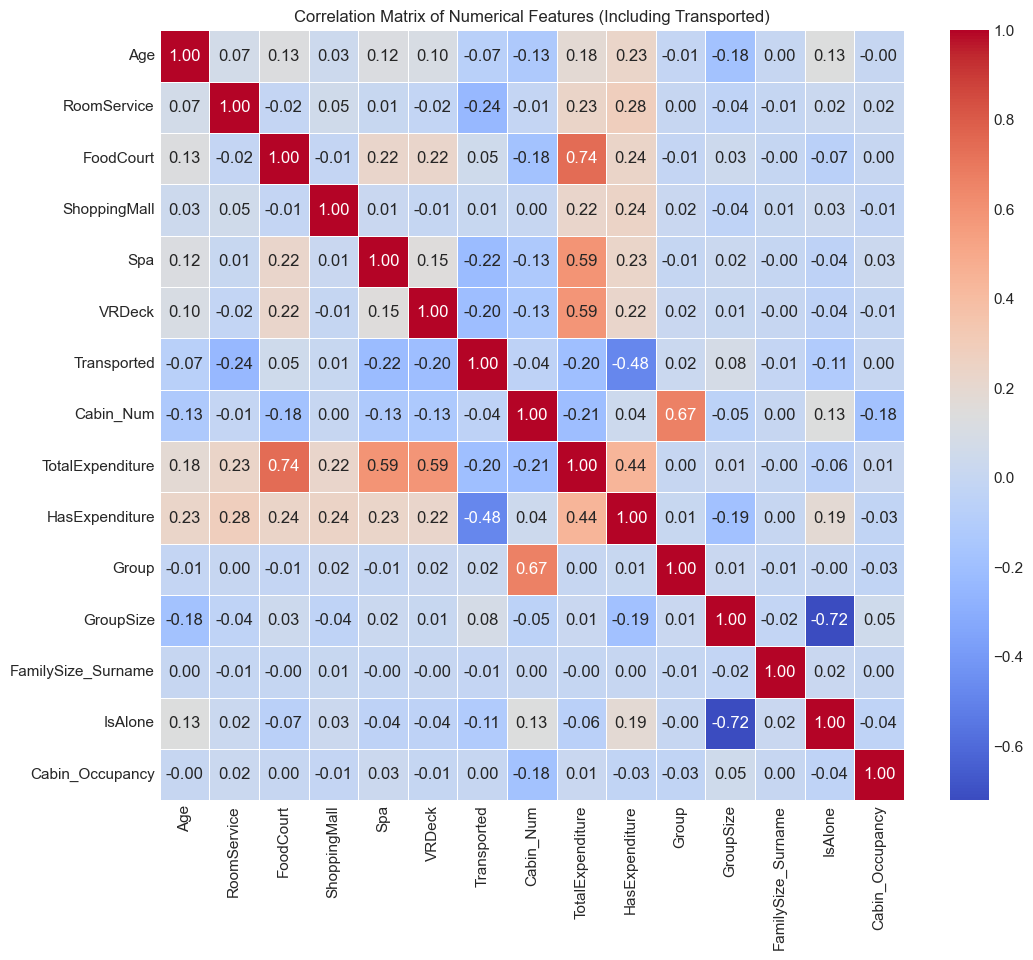

In [124]:
print("\n--- Numerical Feature Correlation Heatmap ---")

# Convert boolean 'Transported' to integer (0 or 1) for correlation calculation
df_train_corr = df_train_processed.copy()
df_train_corr['Transported'] = df_train_corr['Transported'].astype(int)

# Select only numerical columns for the correlation matrix
# Include the integer version of 'Transported'
numerical_for_corr = df_train_corr.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 10))
correlation_matrix = df_train_corr[numerical_for_corr].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features (Including Transported)')
plt.show()

### Final feature selection and create training and validation sets

In [125]:
# --- Final Feature Selection (with new features) ---

# Define the target variable name
target = 'Transported'

# Select features for the model
# Let's try using the new engineered features and drop some originals
# In cell 8089fa3a
features_to_keep_updated = [
    'HomePlanet', 'CryoSleep', 'Destination',
    # 'Age', # EXCLUDE original Age
    'VIP', 'Deck', 'Side',
    'TotalExpenditure', 'HasExpenditure',
    'GroupSize', # Keep GroupSize, exclude 'Group'
    'Title', # INCLUDE New
    'IsAlone', # INCLUDE New
    'Age_Bin', # INCLUDE New - using binned age
    'Cabin_Occupancy', # INCLUDE New
    # Excluded 'FamilySize_Surname', 'Cabin_Num'
]

# Ensure Cabin_Num is explicitly dropped if it wasn't already
# (It was kept in cell f52c3a31 but not added to features_to_keep_updated)
# No need to drop it from the dataframe if it's just not selected here.

# Create final dataframes for modeling using the *updated* feature list
# and the *feature-engineered* dataframes (df_train_processed, df_test_processed)
X_train = df_train_processed[features_to_keep_updated].copy()
y_train = df_train_processed[target].copy()
X_test = df_test_processed[features_to_keep_updated].copy()

print("Selected features for modeling (using updated list):")
print(X_train.columns.tolist())
print(f"\nTraining features shape: {X_train.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test features shape: {X_test.shape}")

# Check final data types one last time
print("\nTraining features info:")
X_train.info()

print("\nTest features info:")
X_test.info()

Selected features for modeling (using updated list):
['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side', 'TotalExpenditure', 'HasExpenditure', 'GroupSize', 'Title', 'IsAlone', 'Age_Bin', 'Cabin_Occupancy']

Training features shape: (8693, 13)
Training target shape: (8693,)
Test features shape: (4277, 13)

Training features info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   HomePlanet        8693 non-null   object  
 1   CryoSleep         8693 non-null   bool    
 2   Destination       8693 non-null   object  
 3   VIP               8693 non-null   bool    
 4   Deck              8693 non-null   object  
 5   Side              8693 non-null   object  
 6   TotalExpenditure  8693 non-null   float64 
 7   HasExpenditure    8693 non-null   int64   
 8   GroupSize         8693 non-null   int64   
 9   Title          

## YDF

In [126]:
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
# test_size=0.2 means 20% of the data becomes the validation set
# random_state ensures reproducibility (the split is the same each time)
# stratify=y_train ensures the proportion of True/False in 'Transported' is ~the same in both sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Original training data size: {len(X_train)}")
print(f"New training split size: {len(X_train_split)}")
print(f"Validation split size: {len(X_val_split)}")

# Verify stratification (proportions should be similar)
print("\nTarget distribution in original training set:")
print(y_train.value_counts(normalize=True))
print("\nTarget distribution in new training split:")
print(y_train_split.value_counts(normalize=True))
print("\nTarget distribution in validation split:")
print(y_val_split.value_counts(normalize=True))

Original training data size: 8693
New training split size: 6954
Validation split size: 1739

Target distribution in original training set:
Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

Target distribution in new training split:
Transported
True     0.503595
False    0.496405
Name: proportion, dtype: float64

Target distribution in validation split:
Transported
True     0.503738
False    0.496262
Name: proportion, dtype: float64


In [127]:
# Ensure the target variable name is defined
target = 'Transported'

# Combine features and labels for the training split
train_df = pd.concat([X_train_split, y_train_split], axis=1)

# Combine features and labels for the validation split
val_df = pd.concat([X_val_split, y_val_split], axis=1)

print("Created combined DataFrames for YDF training and validation.")
print(f"Training DataFrame shape: {train_df.shape}")
print(f"Validation DataFrame shape: {val_df.shape}")
display(train_df.head(3)) # Quick check

Created combined DataFrames for YDF training and validation.
Training DataFrame shape: (6954, 14)
Validation DataFrame shape: (1739, 14)


,HomePlanet,CryoSleep,Destination,VIP,Deck,Side,TotalExpenditure,HasExpenditure,GroupSize,Title,IsAlone,Age_Bin,Cabin_Occupancy,Transported
3600,Earth,False,TRAPPIST-1e,False,G,S,0.0,0,7,Other,0,Child,5,True
1262,Earth,True,TRAPPIST-1e,False,G,S,0.0,0,1,Other,1,Teen,1,True
8612,Earth,False,PSO J318.5-22,False,G,S,0.0,0,1,Other,1,Adult,1,False


### Gradient Boosted Tree (GBT)

In [128]:
# Ensure 'target', 'train_df', and 'val_df' are available from previous cells.
# target = 'Transported'
# train_df was created in Cell 16 (pd.concat([X_train_split, y_train_split], axis=1))
# val_df was created in Cell 16 (pd.concat([X_val_split, y_val_split], axis=1))


# GBT Tuning - Iteration 2
# We'll increase num_trees, slightly increase max_depth, and add min_examples.
tuned_gbt_learner_v2 = ydf.GradientBoostedTreesLearner(
    label=target,
    task=ydf.Task.CLASSIFICATION,
    num_trees=700,        # Increased from 500
    shrinkage=0.05,       # Kept from previous successful tune
    max_depth=6,          # Slightly increased from 5 (can try 4 if this overfits)
    subsample=0.8,        # Kept from previous successful tune
    min_examples=5,       # Minimum number of examples in a leaf node. Helps prevent overfitting.
    # random_seed=42      # For reproducibility
    # Other parameters to consider for finer tuning:
    # growing_strategy="BEST_FIRST_GLOBAL" # Can sometimes find better trees but is slower
    # l1_regularization, l2_regularization
)

print("Training Tuned Gradient Boosted Trees model (Iteration 2)...")
# Ensure train_df is correctly defined from Cell 16
tuned_gbt_model_v2 = tuned_gbt_learner_v2.train(train_df)
print("Tuned GBT Model (Iteration 2) training complete.")

print("\nEvaluating tuned GBT model (Iteration 2) on the validation set...")
# Ensure val_df is correctly defined from Cell 16
tuned_gbt_evaluation_v2 = tuned_gbt_model_v2.evaluate(val_df)
print("Tuned GBT (Iteration 2) Evaluation results:")
print(tuned_gbt_evaluation_v2)

Training Tuned Gradient Boosted Trees model (Iteration 2)...
Train model on 6954 examples
Model trained in 0:00:01.446237
Tuned GBT Model (Iteration 2) training complete.

Evaluating tuned GBT model (Iteration 2) on the validation set...
Tuned GBT (Iteration 2) Evaluation results:
accuracy: 0.751581
confusion matrix:
    label (row) \ prediction (col)
    +-------+-------+-------+
    |       | false |  true |
    +-------+-------+-------+
    | false |   716 |   147 |
    +-------+-------+-------+
    |  true |   285 |   591 |
    +-------+-------+-------+
characteristics:
    name: 'true' vs others
    ROC AUC: 0.814787
    PR AUC: 0.855094
    Num thresholds: 1341
loss: 0.496097
num examples: 1739
num examples (weighted): 1739



In [129]:
# --- Submission Code for tuned_gbt_model_v2 (with Age_Bin feature set) ---

# Ensure X_test is your processed test features DataFrame created
# using the feature list that INCLUDES 'Age_Bin' and EXCLUDES 'Age'.

# Ensure 'tuned_gbt_model_v2' is the model object traine
# using the training data derived from the feature list with 'Age_Bin'.

print(f"Test data shape for prediction using tuned_gbt_model_v2 (Age_Bin version): {X_test.shape}")
print(f"Features being used for prediction: {X_test.columns.tolist()}") # Verify features

# Make predictions on the X_test data
try:
    predictions_proba_tuned_gbt_v2 = tuned_gbt_model_v2.predict(X_test)

    # Convert probabilities to True/False
    submission_predictions_bool_tuned_gbt_v2 = (predictions_proba_tuned_gbt_v2 > 0.5)

    # Load the original test.csv to get PassengerId
    try:
        df_test_original_for_submission = pd.read_csv('test.csv')
    except FileNotFoundError:
        print("Error: 'test.csv' not found. Please ensure the file path is correct.")
        df_test_original_for_submission = None

    if df_test_original_for_submission is not None:
        # Create the submission DataFrame
        submission_df_tuned_gbt_v2 = pd.DataFrame({
            'PassengerId': df_test_original_for_submission['PassengerId'],
            'Transported': submission_predictions_bool_tuned_gbt_v2
        })

        print("\nSample of submission file (tuned_gbt_model_v2 - Age_Bin version):")
        display(submission_df_tuned_gbt_v2.head())

        # Save the submission file
        submission_file_path_tuned_gbt_v2 = 'spaceship_titanic_submission_tuned_gbt_v2_agebin.csv' # Changed name slightly
        submission_df_tuned_gbt_v2.to_csv(submission_file_path_tuned_gbt_v2, index=False)
        print(f"\nSubmission file (tuned_gbt_model_v2 - Age_Bin version) saved to: {submission_file_path_tuned_gbt_v2}")
        print(f"You can now upload '{submission_file_path_tuned_gbt_v2}' to Kaggle.")
    else:
        print("Could not generate submission file because 'test.csv' was not loaded.")

except Exception as e:
    print(f"An error occurred during prediction or file generation: {e}")
    print("Please double-check that X_test has the correct features expected by the model.")

Test data shape for prediction using tuned_gbt_model_v2 (Age_Bin version): (4277, 13)
Features being used for prediction: ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side', 'TotalExpenditure', 'HasExpenditure', 'GroupSize', 'Title', 'IsAlone', 'Age_Bin', 'Cabin_Occupancy']

Sample of submission file (tuned_gbt_model_v2 - Age_Bin version):


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False



Submission file (tuned_gbt_model_v2 - Age_Bin version) saved to: spaceship_titanic_submission_tuned_gbt_v2_agebin.csv
You can now upload 'spaceship_titanic_submission_tuned_gbt_v2_agebin.csv' to Kaggle.


In [130]:
# --- GBT Tuning - Iteration 3 (Using Feature Set with Group Aggregates & Deck_Side) ---

# Ensure 'target', 'train_df', and 'val_df' are available
# AND that they were created using the feature set that includes the
# Group_Mean_Age, Group_Mean_Expenditure, and Deck_Side features.

tuned_gbt_learner_v3 = ydf.GradientBoostedTreesLearner(
    label=target,
    task=ydf.Task.CLASSIFICATION,
    num_trees=800,        # Increase trees slightly more
    shrinkage=0.04,       # Slightly smaller learning rate
    max_depth=6,          # Keep depth the same as the best validation run
    subsample=0.75,       # Slightly adjust subsample
    min_examples=6,       # Slightly adjust min_examples
    # random_seed=42
)

print("Training Tuned Gradient Boosted Trees model (Iteration 3)...")
# Ensure train_df is the one with the latest features
tuned_gbt_model_v3 = tuned_gbt_learner_v3.train(train_df)
print("Tuned GBT Model (Iteration 3) training complete.")

print("\nEvaluating tuned GBT model (Iteration 3) on the validation set...")
# Ensure val_df is the one with the latest features
tuned_gbt_evaluation_v3 = tuned_gbt_model_v3.evaluate(val_df)
print("Tuned GBT (Iteration 3) Evaluation results:")
print(tuned_gbt_evaluation_v3)

Training Tuned Gradient Boosted Trees model (Iteration 3)...
Train model on 6954 examples
Model trained in 0:00:02.123490
Tuned GBT Model (Iteration 3) training complete.

Evaluating tuned GBT model (Iteration 3) on the validation set...
Tuned GBT (Iteration 3) Evaluation results:
accuracy: 0.748131
confusion matrix:
    label (row) \ prediction (col)
    +-------+-------+-------+
    |       | false |  true |
    +-------+-------+-------+
    | false |   715 |   148 |
    +-------+-------+-------+
    |  true |   290 |   586 |
    +-------+-------+-------+
characteristics:
    name: 'true' vs others
    ROC AUC: 0.813223
    PR AUC: 0.854022
    Num thresholds: 1349
loss: 0.500224
num examples: 1739
num examples (weighted): 1739



In [131]:
# --- GBT Tuning - Iteration 4 (More Trees, More Regularization) ---

# Ensure 'target', 'train_df', and 'val_df' are available
# AND that they were created using the feature set that includes the
# Group_Mean_Age, Group_Mean_Expenditure, and Deck_Side features.

tuned_gbt_learner_v4 = ydf.GradientBoostedTreesLearner(
    label=target,
    task=ydf.Task.CLASSIFICATION,
    num_trees=1000,       # Increased from 700
    shrinkage=0.05,       # Kept from previous successful tune
    max_depth=6,          # Kept from previous successful tune
    subsample=0.8,        # Kept from previous successful tune
    min_examples=7,       # Slightly increased from 5 for regularization
    # random_seed=42      # For reproducibility
)

print("Training Tuned Gradient Boosted Trees model (Iteration 4)...")
# Ensure train_df is the one with the latest features
tuned_gbt_model_v4 = tuned_gbt_learner_v4.train(train_df)
print("Tuned GBT Model (Iteration 4) training complete.")

print("\nEvaluating tuned GBT model (Iteration 4) on the validation set...")
# Ensure val_df is the one with the latest features
tuned_gbt_evaluation_v4 = tuned_gbt_model_v4.evaluate(val_df)
print("Tuned GBT (Iteration 4) Evaluation results:")
print(tuned_gbt_evaluation_v4)

Training Tuned Gradient Boosted Trees model (Iteration 4)...
Train model on 6954 examples
Model trained in 0:00:01.325329
Tuned GBT Model (Iteration 4) training complete.

Evaluating tuned GBT model (Iteration 4) on the validation set...
Tuned GBT (Iteration 4) Evaluation results:
accuracy: 0.751581
confusion matrix:
    label (row) \ prediction (col)
    +-------+-------+-------+
    |       | false |  true |
    +-------+-------+-------+
    | false |   715 |   148 |
    +-------+-------+-------+
    |  true |   284 |   592 |
    +-------+-------+-------+
characteristics:
    name: 'true' vs others
    ROC AUC: 0.813393
    PR AUC: 0.854228
    Num thresholds: 1341
loss: 0.498
num examples: 1739
num examples (weighted): 1739



In [ ]:
# --- Automated Hyperparameter Tuning for GBT (Corrected based on documentation) ---
import logging

# Optional: Set logging level to see more details from YDF, including tuning logs
# ydf.verbose(2) # or logging.basicConfig(level=logging.INFO)

# Ensure 'target', 'train_df', and 'val_df' are available
# AND that they were created using the feature set that gave your best Kaggle score
# (the one including Group_Mean_Age, Group_Mean_Expenditure, Deck_Side)

print("Starting automated hyperparameter tuning for GradientBoostedTreesLearner...")
print(f"Using YDF version: {ydf.__version__}")

# 1. Define number of trials and create the tuner
num_tuning_trials = 30 # Define the number of trials here
tuner = ydf.RandomSearchTuner(num_trials=num_tuning_trials)

# 2. Define the hyperparameter search space (optional, but recommended for control)
# If not provided, YDF uses a default search space for the learner.
# For GBT, common ones are: shrinkage, max_depth, subsample, min_examples
# You can define the search space for the tuner object directly:
# tuner.choice("shrinkage", [0.01, 0.02, 0.05, 0.1])
# tuner.choice("max_depth", [3, 4, 5, 6, 7, 8])
# tuner.choice("subsample", [0.7, 0.8, 0.9, 1.0])
# tuner.integer("min_examples", 2, 20)
# tuner.choice("num_trees_for_tuning", [100, 200, 300, 500]) # Special name for num_trees in tuner

# For now, let's let YDF use its default search space for GBT.

# 3. Define the learner, passing the tuner to its constructor
# We can also set base parameters that are NOT tuned here, like num_trees for the final model.
# The tuner might use a different number of trees for each trial (e.g., via 'num_trees_for_tuning').
gbt_base_learner_with_tuner = ydf.GradientBoostedTreesLearner(
    label=target,
    task=ydf.Task.CLASSIFICATION,
    num_trees=700, # Base num_trees for the *final* best model, tuner might vary this for trials
    tuner=tuner    # Pass the tuner object here
)

# 4. Run the training process
# The learner, now configured with the tuner, will handle the hyperparameter search.
print(f"Tuning with {num_tuning_trials} trials...")
try:
    tuned_gbt_model_auto = gbt_base_learner_with_tuner.train(
        train_df,
        valid=val_df # Pass validation data for the tuner's evaluation
    )
    # The train method should return the best model found by the tuner.

    print("\n--- Automated Tuning Complete ---")

    # 5. Evaluate the best model found by the tuner on the validation set
    if tuned_gbt_model_auto:
        print("\nEvaluating the best model from auto-tuning on the validation set...")
        auto_tuned_gbt_evaluation = tuned_gbt_model_auto.evaluate(val_df)
        print("Auto-Tuned GBT Evaluation results:")
        print(auto_tuned_gbt_evaluation)

        # The documentation mentions that tuning logs are in model.describe()
        # Let's try to access them or at least the best hyperparameters
        print("\nModel description (may include tuning logs or best HPs):")
        # model.describe() in a notebook often produces rich output.
        # For programmatic access, we can inspect the trained model's HPs.
        try:
            print("\nHyperparameters of the best model found:")
            inspector = tuned_gbt_model_auto.make_inspector()
            # print(inspector.tuning_logs) # If available and you want to see all trials
            print(inspector.hyperparameters) # Hyperparameters of the final best model
        except Exception as inspect_e:
            print(f"Could not inspect hyperparameters or tuning logs: {inspect_e}")

    else:
        print("Auto-tuning did not produce a model.")

except Exception as e:
    print(f"\nAn unexpected error occurred during tuning: {e}")
    print("Please ensure your YDF version matches the documentation if issues persist.")

Starting automated hyperparameter tuning for GradientBoostedTreesLearner...
Using YDF version: 0.8.0
Tuning with 30 trials...
Train model on 6954 training examples and 1739 validation examples
Model trained in 0:00:00.471436

--- Automated Tuning Complete ---

Evaluating the best model from auto-tuning on the validation set...
Auto-Tuned GBT Evaluation results:
accuracy: 0.746981
confusion matrix:
    label (row) \ prediction (col)
    +-------+-------+-------+
    |       | false |  true |
    +-------+-------+-------+
    | false |   720 |   143 |
    +-------+-------+-------+
    |  true |   297 |   579 |
    +-------+-------+-------+
characteristics:
    name: 'true' vs others
    ROC AUC: 0.813741
    PR AUC: 0.851771
    Num thresholds: 1109
loss: 0.497777
num examples: 1739
num examples (weighted): 1739


Model description (may include tuning logs or best HPs):

Hyperparameters of the best model found:
Could not inspect hyperparameters or tuning logs: 'GradientBoostedTreesModel'

In [135]:
# --- Automated Hyperparameter Tuning for GBT (Corrected num_trees in tuner) ---
import pandas as pd
import ydf
import logging

# Optional: Set logging level
# ydf.verbose(2)

# Ensure 'target', 'train_df', and 'val_df' are available and correct

print("Starting refined automated hyperparameter tuning for GradientBoostedTreesLearner...")
print(f"Using YDF version: {ydf.__version__}")

# 1. Define number of trials and create the tuner
num_tuning_trials = 50
tuner = ydf.RandomSearchTuner(num_trials=num_tuning_trials)

# 2. Define the hyperparameter search space for the tuner
tuner.choice("shrinkage", [0.03, 0.04, 0.05, 0.06, 0.07])
tuner.choice("max_depth", [5, 6, 7])
tuner.choice("subsample", [0.7, 0.75, 0.8, 0.85])
tuner.choice("min_examples", [3, 4, 5, 6, 7, 8, 9, 10])
# tuner.choice("num_trees_for_tuner", [500, 700, 800, 1000, 1200]) # <-- INCORRECT LINE
tuner.choice("num_trees", [500, 700, 800, 1000, 1200]) # <-- CORRECTED: Use standard "num_trees"

# 3. Define the learner, passing the tuner to its constructor
# The num_trees set here might be overridden by the tuner if "num_trees" is in the search space.
gbt_base_learner_with_tuner = ydf.GradientBoostedTreesLearner(
    label=target,
    task=ydf.Task.CLASSIFICATION,
    # num_trees=700, # Base num_trees, likely overridden by tuner now
    tuner=tuner    # Pass the tuner object here
)

# 4. Run the training process
print(f"Tuning with {num_tuning_trials} trials...")
try:
    tuned_gbt_model_auto_refined = gbt_base_learner_with_tuner.train(
        train_df,
        valid=val_df
    )

    print("\n--- Refined Automated Tuning Complete ---")

    # 5. Evaluate the best model found by the tuner on the validation set
    if tuned_gbt_model_auto_refined:
        print("\nEvaluating the best model from refined auto-tuning on the validation set...")
        auto_tuned_gbt_evaluation_refined = tuned_gbt_model_auto_refined.evaluate(val_df)
        print("Refined Auto-Tuned GBT Evaluation results:")
        print(auto_tuned_gbt_evaluation_refined)

        try:
            print("\nHyperparameters of the best model found:")
            # For YDF 0.8.0, hyperparameters might be directly accessible
            if hasattr(tuned_gbt_model_auto_refined, 'hyperparameters'):
                 print(tuned_gbt_model_auto_refined.hyperparameters())
            else:
                # Fallback attempt if direct access fails
                 inspector = tuned_gbt_model_auto_refined.make_inspector()
                 print(inspector.hyperparameters)
        except Exception as inspect_e:
            print(f"Could not inspect hyperparameters: {inspect_e}")
            print("Try printing model.describe() in a notebook cell for details.")

    else:
        print("Refined auto-tuning did not produce a model.")

except Exception as e:
    print(f"\nAn unexpected error occurred during refined tuning: {e}")

Starting refined automated hyperparameter tuning for GradientBoostedTreesLearner...
Using YDF version: 0.8.0
Tuning with 50 trials...
Train model on 6954 training examples and 1739 validation examples
Model trained in 0:00:52.411619

--- Refined Automated Tuning Complete ---

Evaluating the best model from refined auto-tuning on the validation set...
Refined Auto-Tuned GBT Evaluation results:
accuracy: 0.748131
confusion matrix:
    label (row) \ prediction (col)
    +-------+-------+-------+
    |       | false |  true |
    +-------+-------+-------+
    | false |   721 |   142 |
    +-------+-------+-------+
    |  true |   296 |   580 |
    +-------+-------+-------+
characteristics:
    name: 'true' vs others
    ROC AUC: 0.82019
    PR AUC: 0.856572
    Num thresholds: 1296
loss: 0.492898
num examples: 1739
num examples (weighted): 1739


Hyperparameters of the best model found:
Could not inspect hyperparameters: 'GradientBoostedTreesModel' object has no attribute 'make_inspector'


In [ ]:
# --- Submission Code for tuned_gbt_model_auto_refined ---
import pandas as pd
# Ensure ydf is imported if this cell is run in a new session
# import ydf

# Ensure X_test is your processed test features DataFrame,
# matching the features used to train tuned_gbt_model_auto_refined.

# Ensure 'tuned_gbt_model_auto_refined' is your trained model object
# from the refined automated tuning cell (e.g., Cell 30).

print(f"Test data shape for prediction using tuned_gbt_model_auto_refined: {X_test.shape}")
print(f"Features in X_test: {X_test.columns.tolist()}") # Good to double-check

# Make predictions on the X_test data
try:
    predictions_proba_auto_refined = tuned_gbt_model_auto_refined.predict(X_test)

    # Convert probabilities to True/False
    submission_predictions_bool_auto_refined = (predictions_proba_auto_refined > 0.5)

    # Load the original test.csv to get PassengerId
    # Make sure 'test.csv' path is correct
    try:
        df_test_original_for_submission = pd.read_csv('test.csv')
    except FileNotFoundError:
        print("Error: 'test.csv' not found. Please ensure the file path is correct.")
        df_test_original_for_submission = None

    if df_test_original_for_submission is not None:
        # Create the submission DataFrame
        submission_df_auto_refined = pd.DataFrame({
            'PassengerId': df_test_original_for_submission['PassengerId'],
            'Transported': submission_predictions_bool_auto_refined
        })

        print("\nSample of submission file (tuned_gbt_model_auto_refined):")
        display(submission_df_auto_refined.head())

        # Save the submission file
        submission_file_path_auto_refined = 'spaceship_titanic_submission_auto_refined_gbt.csv'
        submission_df_auto_refined.to_csv(submission_file_path_auto_refined, index=False)
        print(f"\nSubmission file (tuned_gbt_model_auto_refined) saved to: {submission_file_path_auto_refined}")
        print(f"You can now upload '{submission_file_path_auto_refined}' to Kaggle.")
    else:
        print("Could not generate submission file because 'test.csv' was not loaded.")

except Exception as e:
    print(f"An error occurred: {e}")
    print("Please ensure 'tuned_gbt_model_auto_refined' is correctly trained and 'X_test' has the matching features.")

Test data shape for prediction using tuned_gbt_model_auto_refined: (4277, 13)
Features in X_test: ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side', 'TotalExpenditure', 'HasExpenditure', 'GroupSize', 'Title', 'IsAlone', 'Age_Bin', 'Cabin_Occupancy']

Sample of submission file (tuned_gbt_model_auto_refined):


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False



Submission file (tuned_gbt_model_auto_refined) saved to: spaceship_titanic_submission_auto_refined_gbt.csv
You can now upload 'spaceship_titanic_submission_auto_refined_gbt.csv' to Kaggle.
